In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/Darknet.csv')

# Display the DataFrame
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0.0,0.0,0.0,0.0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32916 entries, 0 to 32915
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     32916 non-null  object 
 1   Src IP                      32916 non-null  object 
 2   Src Port                    32916 non-null  int64  
 3   Dst IP                      32916 non-null  object 
 4   Dst Port                    32916 non-null  int64  
 5   Protocol                    32916 non-null  int64  
 6   Timestamp                   32916 non-null  object 
 7   Flow Duration               32916 non-null  int64  
 8   Total Fwd Packet            32916 non-null  int64  
 9   Total Bwd packets           32916 non-null  int64  
 10  Total Length of Fwd Packet  32916 non-null  int64  
 11  Total Length of Bwd Packet  32916 non-null  int64  
 12  Fwd Packet Length Max       32916 non-null  int64  
 13  Fwd Packet Length Min       329

In [4]:


# Remove duplicates
df = df.drop_duplicates()



In [5]:

# Handle missing values
df = df.dropna()  # or you can use fillna() to fill missing values


In [6]:
df = df.drop(columns=['Label','Flow ID','Src IP','Dst IP','Timestamp'])

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Standardize numeric features
scaler = StandardScaler()
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features] = scaler.fit_transform(df[numeric_features])





In [8]:
label_encoder = LabelEncoder()

# Fit and transform the column
df['Label.1'] = label_encoder.fit_transform(df['Label.1'])

# View the DataFrame
print(df)

       Src Port  Dst Port  Protocol  Flow Duration  Total Fwd Packet  \
0      0.984989 -0.530478 -0.632746      -0.514329         -0.119386   
1      0.985039 -0.530478 -0.632746      -0.514324         -0.119386   
2      0.985088 -0.530478 -0.632746      -0.514324         -0.119386   
3      0.588622 -0.530478 -0.632746      -0.514326         -0.119386   
4     -0.124534  0.416398 -0.632746      -0.229238          2.721342   
...         ...       ...       ...            ...               ...   
29676  0.347758 -0.550056  1.572513      -0.504324         -0.114571   
29677 -0.081360 -0.550056  1.572513      -0.502019         -0.114571   
29678 -1.834536  2.006891 -0.632746      -0.514335         -0.119386   
29679 -1.834536  1.897405 -0.632746      -0.514335         -0.119386   
29680  0.194724 -0.550056  1.572513      -0.504115         -0.114571   

       Total Bwd packets  Total Length of Fwd Packet  \
0              -0.126626                   -0.116359   
1              -0.12662

In [11]:
import numpy as np

# Check for NaN values
print(df[numeric_features].isna().sum())

# Check for infinity or very large values
print(np.isinf(df[numeric_features]).sum())
print((df[numeric_features] > 1e308).sum())  # Assuming `float64` maximum value limit


Src Port            0
Dst Port            0
Protocol            0
Flow Duration       0
Total Fwd Packet    0
                   ..
Active Min          0
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
Length: 79, dtype: int64
Src Port            0
Dst Port            0
Protocol            0
Flow Duration       0
Total Fwd Packet    0
                   ..
Active Min          0
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
Length: 79, dtype: int64
Src Port            0
Dst Port            0
Protocol            0
Flow Duration       0
Total Fwd Packet    0
                   ..
Active Min          0
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
Length: 79, dtype: int64


In [10]:
print(df.columns)


Index(['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN

In [59]:
import numpy as np

# Check if there are any infinite values
print(np.isinf(df).sum())  # Counts of infinite values per column

# Display rows with infinite values
print(df[df.isin([np.inf, -np.inf]).any(axis=1)])

Src Port            0
Dst Port            0
Protocol            0
Flow Duration       0
Total Fwd Packet    0
                   ..
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
Label.1             0
Length: 80, dtype: int64
        Src Port  Dst Port  Protocol  Flow Duration  Total Fwd Packet  \
52939      47339       443         6              0                 1   
106128     44696       443         6              0                 2   

        Total Bwd packets  Total Length of Fwd Packet  \
52939                   1                          53   
106128                  0                          31   

        Total Length of Bwd Packet  Fwd Packet Length Max  \
52939                            0                     53   
106128                           0                     31   

        Fwd Packet Length Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
52939                      53  ...                20            0           

In [12]:
import numpy as np

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN (formerly infinite values) with the column mean
df.fillna(df.mean(), inplace=True)

# Verify there are no more infinite or NaN values
print("Infinite values per column after handling:", np.isinf(df).sum())
print("NaN values per column after handling:", df.isnull().sum())


Infinite values per column after handling: Src Port            0
Dst Port            0
Protocol            0
Flow Duration       0
Total Fwd Packet    0
                   ..
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
Label.1             0
Length: 80, dtype: int64
NaN values per column after handling: Src Port            0
Dst Port            0
Protocol            0
Flow Duration       0
Total Fwd Packet    0
                   ..
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
Label.1             0
Length: 80, dtype: int64


In [13]:
df.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label.1
0,0.984989,-0.530478,-0.632746,-0.514329,-0.119386,-0.126626,-0.116359,-0.112899,-0.554945,-0.585062,...,0.636425,0.0,0.0,0.0,0.0,-1.186831,-0.329249,-1.219123,-0.931272,0
1,0.985039,-0.530478,-0.632746,-0.514324,-0.119386,-0.126626,-0.116359,-0.112899,-0.554945,-0.585062,...,0.636425,0.0,0.0,0.0,0.0,-1.186831,-0.329249,-1.219123,-0.931272,0
2,0.985088,-0.530478,-0.632746,-0.514324,-0.119386,-0.126626,-0.116359,-0.112899,-0.554945,-0.585062,...,0.636425,0.0,0.0,0.0,0.0,-1.186831,-0.329249,-1.219123,-0.931272,0
3,0.588622,-0.530478,-0.632746,-0.514326,-0.119386,-0.126626,-0.116359,-0.112899,-0.554945,-0.585062,...,0.636425,0.0,0.0,0.0,0.0,-1.186831,-0.329249,-1.219123,-0.931272,0
4,-0.124534,0.416398,-0.632746,-0.229238,2.721342,1.683387,4.086466,-0.068947,-0.218128,-0.585062,...,0.636425,0.0,0.0,0.0,0.0,0.884794,-0.329249,0.796531,1.050530,0


In [14]:
df

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label.1
0,0.984989,-0.530478,-0.632746,-0.514329,-0.119386,-0.126626,-0.116359,-0.112899,-0.554945,-0.585062,...,0.636425,0.0,0.0,0.0,0.0,-1.186831,-0.329249,-1.219123,-0.931272,0
1,0.985039,-0.530478,-0.632746,-0.514324,-0.119386,-0.126626,-0.116359,-0.112899,-0.554945,-0.585062,...,0.636425,0.0,0.0,0.0,0.0,-1.186831,-0.329249,-1.219123,-0.931272,0
2,0.985088,-0.530478,-0.632746,-0.514324,-0.119386,-0.126626,-0.116359,-0.112899,-0.554945,-0.585062,...,0.636425,0.0,0.0,0.0,0.0,-1.186831,-0.329249,-1.219123,-0.931272,0
3,0.588622,-0.530478,-0.632746,-0.514326,-0.119386,-0.126626,-0.116359,-0.112899,-0.554945,-0.585062,...,0.636425,0.0,0.0,0.0,0.0,-1.186831,-0.329249,-1.219123,-0.931272,0
4,-0.124534,0.416398,-0.632746,-0.229238,2.721342,1.683387,4.086466,-0.068947,-0.218128,-0.585062,...,0.636425,0.0,0.0,0.0,0.0,0.884794,-0.329249,0.796531,1.050530,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29676,0.347758,-0.550056,1.572513,-0.504324,-0.114571,-0.122090,-0.111018,-0.112252,-0.449529,1.539212,...,-1.560999,0.0,0.0,0.0,0.0,0.911539,-0.329249,0.822554,1.076115,2
29677,-0.081360,-0.550056,1.572513,-0.502019,-0.114571,-0.122090,-0.112060,-0.112357,-0.470098,1.124719,...,-1.560999,0.0,0.0,0.0,0.0,0.911540,-0.329249,0.822555,1.076117,2
29678,-1.834536,2.006891,-0.632746,-0.514335,-0.119386,-0.126626,-0.116359,-0.112899,-0.554945,-0.585062,...,0.636425,0.0,0.0,0.0,0.0,-1.186831,-0.329249,-1.219123,-0.931272,2
29679,-1.834536,1.897405,-0.632746,-0.514335,-0.119386,-0.126626,-0.116359,-0.112899,-0.554945,-0.585062,...,0.636425,0.0,0.0,0.0,0.0,-1.186831,-0.329249,-1.219123,-0.931272,2


In [15]:
# Split dataset into features and labels
X = df.drop(['Label.1'], axis=1)
y = df['Label.1']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# List of algorithms to apply
algorithms = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Neural Network', MLPClassifier()),
    ('XGBoost', XGBClassifier()),
    ('AdaBoost', AdaBoostClassifier())
]



In [18]:
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.metrics import recall_score

# Function to evaluate models
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f'{name} - Accuracy: {accuracy}')
    print(f'{name} - F1-Score: {f1}')
    print(f'{name} - Precision: {precision}')
    print(f'{name} - Recall: {recall}\n')

# Apply and evaluate each algorithm
for name, model in algorithms:
    evaluate_model(name, model)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.9404129793510324
Logistic Regression - F1-Score: 0.9328134270604231
Logistic Regression - Precision: 0.9331709855575563
Logistic Regression - Recall: 0.9404129793510324

Decision Tree - Accuracy: 0.9746312684365782
Decision Tree - F1-Score: 0.9745437566631961
Decision Tree - Precision: 0.974722989035653
Decision Tree - Recall: 0.9746312684365782

Random Forest - Accuracy: 0.9781710914454277
Random Forest - F1-Score: 0.977314465069844
Random Forest - Precision: 0.9777362027949976
Random Forest - Recall: 0.9781710914454277

Gradient Boosting - Accuracy: 0.9775811209439528
Gradient Boosting - F1-Score: 0.976834875043901
Gradient Boosting - Precision: 0.9770679907225319
Gradient Boosting - Recall: 0.9775811209439528

Support Vector Machine - Accuracy: 0.9569321533923304
Support Vector Machine - F1-Score: 0.9525059590043684
Support Vector Machine - Precision: 0.9531797283864296
Support Vector Machine - Recall: 0.9569321533923304

K-Nearest Neighbors - Accur

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Accuracy: 0.5174041297935104
AdaBoost - F1-Score: 0.6100869838933719
AdaBoost - Precision: 0.8391044690038092
AdaBoost - Recall: 0.5174041297935104



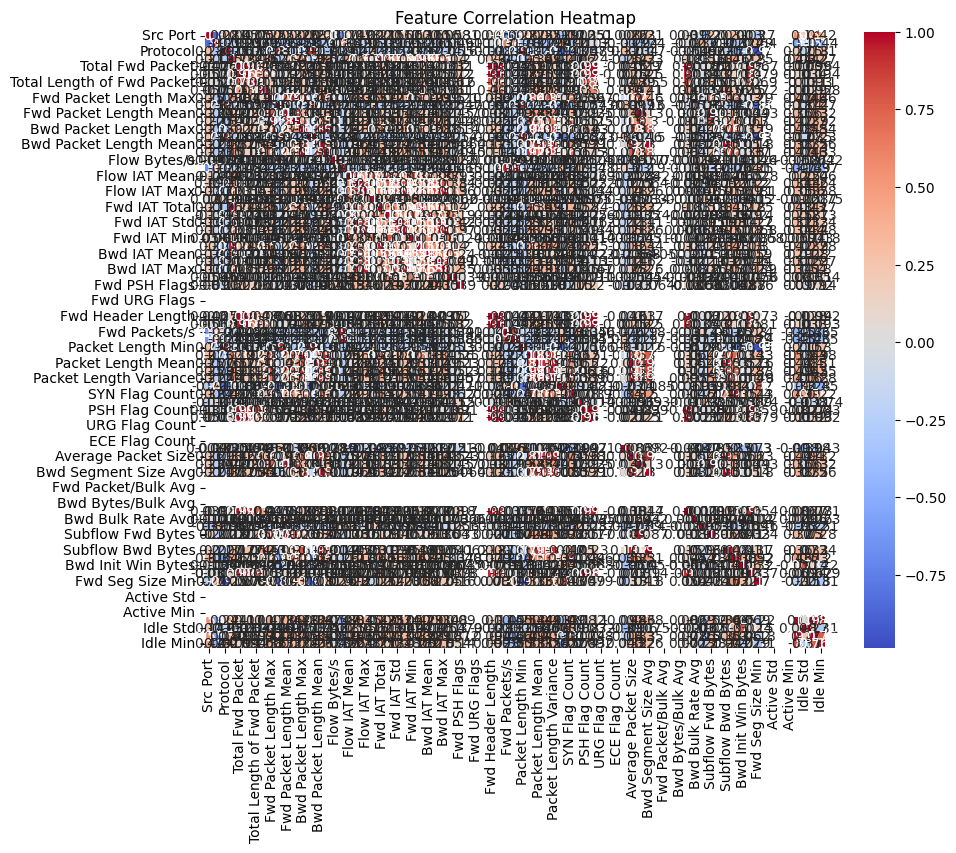

In [21]:
import pandas as pd               # For working with data
import seaborn as sns             # For creating the heatmap
import matplotlib.pyplot as plt   # For plotting
correlation_matrix = pd.DataFrame(X, columns=df.columns[:-1]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

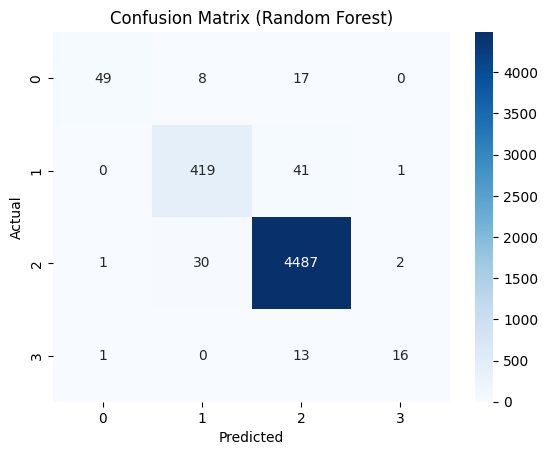

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
sample_model = RandomForestClassifier()
sample_model.fit(X_train, y_train)
y_pred_sample = sample_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_sample)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
